<a href="https://colab.research.google.com/github/microprediction/winning/blob/main/triangle_man.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install winning

## A map from the simplex to cube
This notebook investigates the use of the so-called ability transform to create bijections from the simplex to the cube. These maps are computationally tractible up to 100,000 dimensions. Here we try to visualize a very low dimensioncal map. 

In [2]:
from winning.std_calibration import std_ability_implied_state_prices, std_state_price_implied_ability
from scipy.stats import norm
from typing import List

    
def cube_to_simplex(u:List[float]) -> List[float]: 
    """
       :param  u is a point on the interior of the hyper-cube (0,1)^n 
       :returns  a point p in (0,1)^{n+1} with sum(p)=1 
     
    """
    a = [0] + [ -norm.ppf(ui) for ui in u ]
    p = std_ability_implied_state_prices(a)
    return p 


def simplex_to_cube(p:List[float]):
    """ The inverse map 
    
         :param    p in [0,1]^{n+1}  with entries summing to unity 
         :returns  (0,1)^n 
    
    """
    x_mean_zero = std_state_price_implied_ability(p)
    offset = x_mean_zero[0]
    a =  [ xi-offset for xi in x_mean_zero ]
    return [ norm.cdf(ai) for ai in a[1:] ]
    

## Examples

In [3]:
simplex_to_cube([0.25,0.25,0.25,0.25])

[0.5, 0.5, 0.5]

In [10]:
simplex_to_cube([0.35,0.25,0.25,0.15])

[0.6002788374851822, 0.6002788374851822, 0.7288015507586241]

### Corners

In [12]:
simplex_to_cube([0.98,0.01,0.01]),simplex_to_cube([0.01,0.98,0.01]),simplex_to_cube([0.01,0.01,0.98])

([0.9994399113937293, 0.9994399113937293],
 [0.000560088606270627, 0.5],
 [0.5, 0.0005600886062706243])

In [14]:
cube_to_simplex([0.0001,0.0001]),cube_to_simplex([0.9999,0.0001]),cube_to_simplex([0.9999,0.9999]),cube_to_simplex([0.9999,0.0001])

([0.991796977822986, 0.004097490983014038, 0.004097490983014038],
 [0.0042985798038551815, 0.9830667839032847, 4.026707310234546e-08],
 [0.00040156074649629997, 0.5001746590742873, 0.5001746590742873],
 [0.0042985798038551815, 0.9830667839032847, 4.026707310234546e-08])

### Traveling around the triangle
We create concentric triangles in the simplex and plot the images on the cube. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def combos(x,y):
    lmbds = np.linspace(0,1,100)
    return np.array([ (1-lmbd)*x+lmbd*y for lmbd in lmbds])


def make_sides(eps):
    corner1 = np.array([1,0,0])
    corner2 = np.array([0,1,0])
    corner3 = np.array([0,0,1])
    middle = np.array([1/3.,1/3.,1/3.])
    corner1eps = eps*middle + (1 - eps)*corner1
    corner2eps = eps*middle + (1 - eps)*corner2
    corner3eps = eps*middle + (1 - eps)*corner3
    side12 = combos(corner1eps,corner2eps)
    side23 = combos(corner2eps, corner3eps)
    side31 = combos(corner3eps, corner1eps)
    return [side12,side23,side31]


def plot_on_cube(ts, ls, c):
    x = [t[0] for t in ts]
    y = [t[1] for t in ts]
    plt.plot(x, y, ls + c)


def plot_image(eps, ls):
    sides = make_sides(eps)
    for side, c in zip(sides, ['r', 'g', 'b']):
        ts = [simplex_to_cube(s) for s in side]
        plot_on_cube(ts=ts, ls=ls, c=c)


def plot_concentric_on_cube():
    for eps, ls in zip([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], ['-']*100):
        plot_image(eps, ls)




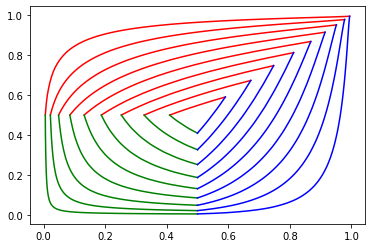

In [24]:
plot_concentric_on_cube()